In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import jax
import jax.numpy as jnp
import jax.random as jr

import optax
jax.config.update('jax_platform_name', 'cpu')

import pickle

import os
if not os.path.exists('./output'):
    os.makedirs('./output')

import sys

sys.path.append("..")
import lib

sys.path.append("../scripts/")
import synthetic



import matplotlib.pyplot as plt
plt.style.use(['../paper.mplstyle'])

/var/home/dl543/Documents/Learning/nonparametric-modulated-renewal/notebooks/../lib/filters/FIR.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
datadir = '../scripts/checkpoint/'
name = 'syn_data_seed123ISI3sel0.0to0.1_isi3__nonparam_pp_gp-8-matern32-10-spatial_full-fixed_grid-100-12._X[x-y-theta]_Z[]'
#'syn_data_seed123ISI3sel0.0to0.1_PP-log__factorized_gp-32-100_X[x-y-theta]_Z[]'

model = pickle.load(
    open(datadir + name + ".p", "rb")
)
results = pickle.load(
    open(datadir + name + "_result.p", "rb")
)

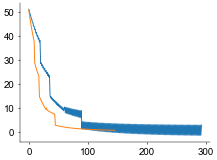

In [3]:
plt.plot(results['losses']['train_loss_batches'])
plt.plot(results['losses']['train_loss_epochs'])

In [26]:
model.obs_model.gp.evaluate_posterior()

TypeError: evaluate_posterior() missing 6 required positional arguments: 'x', 'mean_only', 'diag_cov', 'compute_KL', 'compute_aux', and 'jitter'

In [4]:
model

GPLVM(
  array_type=0,
  inp_model=GaussianLatentObservedSeries(
    array_type=0,
    ssgp=None,
    lat_dims=[],
    obs_dims=[0, 1, 2],
    x_dims=3,
    diagonal_cov=True
  ),
  obs_model=NonparametricPointProcess(
    array_type=0,
    gp=KroneckerLTI(
      array_type=0,
      site_locs=f32[5,10],
      site_obs=f32[5,10,8,1],
      site_Lcov=f32[5,10,8,8],
      kernel=MarkovSparseKronecker(
        array_type=0,
        in_dims=6,
        out_dims=5,
        state_dims=50,
        markov_factor=Matern32(
          array_type=0,
          in_dims=1,
          out_dims=5,
          state_dims=10,
          pre_len=f32[5,1],
          pre_var=f32[5],
          metric_type=0
        ),
        sparse_factor=Product(
          array_type=0,
          in_dims=5,
          out_dims=5,
          kernels=[
            SquaredExponential(
              array_type=0,
              in_dims=4,
              out_dims=5,
              state_dims=None,
              pre_len=f32[5,4],
         